<a href="https://colab.research.google.com/github/vijipandian/project/blob/main/Flight_Ticket_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
data=pd.read_csv(r"/content/airlines_flights_data.csv")
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
#Cleaning data
data.drop(columns="index",inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [10]:
data.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [11]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [12]:
data[data["days_left"]==49.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
9782,Vistara,UK-975,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.00,49,2476
9783,Vistara,UK-953,Delhi,Night,zero,Night,Mumbai,Economy,2.17,49,2476
9784,Vistara,UK-981,Delhi,Night,zero,Night,Mumbai,Economy,2.17,49,2476
9785,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,49,2700
9786,Vistara,UK-993,Delhi,Afternoon,zero,Afternoon,Mumbai,Economy,2.17,49,2700
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [13]:
data[data["duration"]==39.670000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
29418,Air_India,AI-435,Delhi,Early_Morning,two_or_more,Night,Hyderabad,Economy,39.67,7,10474
29909,Air_India,AI-435,Delhi,Early_Morning,two_or_more,Night,Hyderabad,Economy,39.67,11,10474
30301,Air_India,AI-435,Delhi,Early_Morning,two_or_more,Night,Hyderabad,Economy,39.67,14,9831
158656,Air_India,AI-9893,Hyderabad,Early_Morning,one,Night,Mumbai,Economy,39.67,2,19167


In [14]:
data[data["price"]==35145.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
35512,Air_India,AI-877,Delhi,Morning,two_or_more,Early_Morning,Chennai,Economy,20.33,2,35145


In [15]:
data["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [16]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [17]:
#show the businessclass.
x=data[data['class']=='Business']
x

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612
206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612
206668,Air_India,AI-531,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220
206669,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450
206670,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [18]:
data.groupby("class")["price"].agg(['mean'])

,mean
class,
Business,52540.081124
Economy,6572.342383


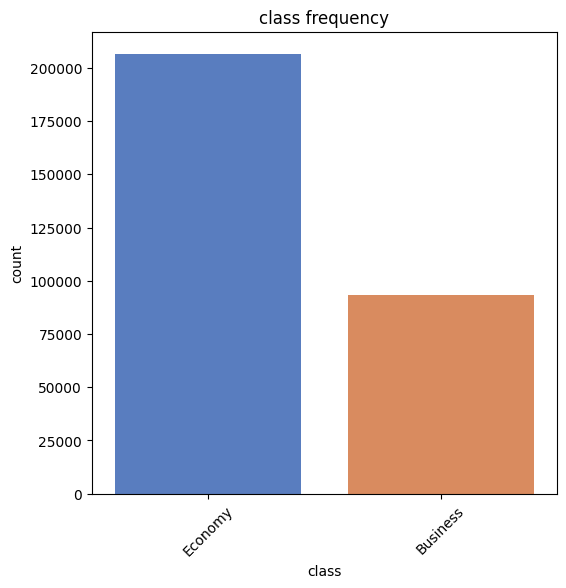

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x="class",data=data,hue="class",legend=False,palette='muted')
plt.xticks(rotation=45)
plt.title("class frequency")
plt.show()

In [20]:
data["departure_time"].value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


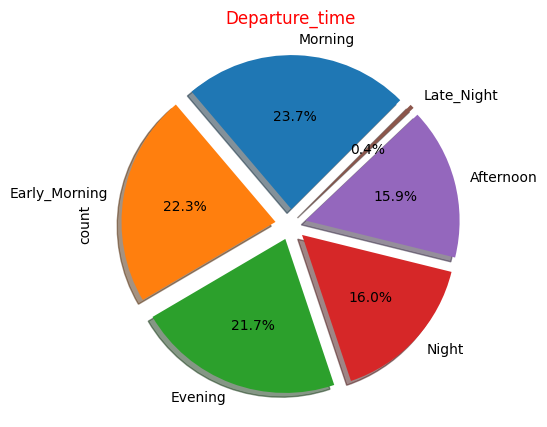

In [21]:
plt.figure(figsize=(6,5))
explode=(0.1,0.1,0.1,0.1,0.1,0.1)
dep=data['departure_time'].value_counts()
dep.plot(kind="pie",autopct="%1.1f%%",startangle=45,explode=explode,shadow=True)
plt.title("Departure_time",color="Red")
plt.show()

In [22]:
data["arrival_time"].value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


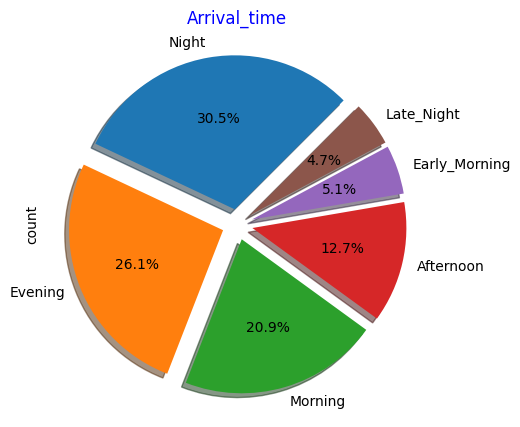

In [23]:
plt.figure(figsize=(6,5))
explode=(0.1,0.1,0.1,0.1,0.1,0.1)
x=data['arrival_time'].value_counts()
x.plot(kind="pie",autopct="%1.1f%%",startangle=45,explode=explode,shadow=True)
plt.title("Arrival_time",color="Blue")
plt.show()

In [24]:
data["source_city"].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


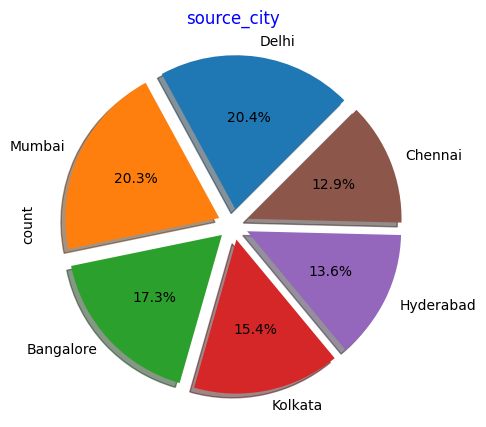

In [25]:
plt.figure(figsize=(6,5))
explode=(0.1,0.1,0.1,0.1,0.1,0.1)
city=data['source_city'].value_counts()
city.plot(kind="pie",autopct="%1.1f%%",startangle=45,explode=explode,shadow=True)
plt.title("source_city",color="Blue")
plt.show()

In [26]:
data["airline"].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


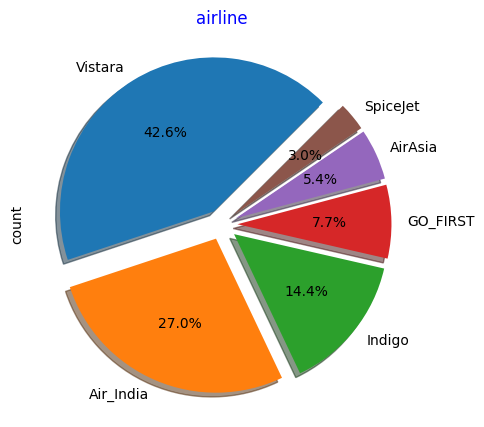

In [27]:
plt.figure(figsize=(6,5))
explode=(0.1,0.1,0.1,0.1,0.1,0.1)
al=data['airline'].value_counts()
al.plot(kind="pie",autopct="%1.1f%%",startangle=45,explode=explode,shadow=True)
plt.title("airline",color="Blue")
plt.show()

In [28]:
data["destination_city"].value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


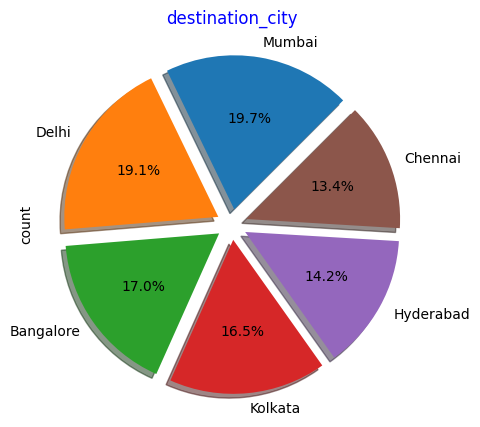

In [29]:
plt.figure(figsize=(6,5))
explode=(0.1,0.1,0.1,0.1,0.1,0.1)
des=data['destination_city'].value_counts()
des.plot(kind="pie",autopct="%1.1f%%",startangle=45,explode=explode,shadow=True)
plt.title("destination_city",color="Blue")
plt.show()

In [30]:
data.groupby("days_left")["price"].mean()

,price
days_left,
1,21591.867151
2,30211.299801
3,28976.083569
4,25730.905653
5,26679.773368
6,24856.493902
7,25588.367351
8,24895.883995
9,25726.246072


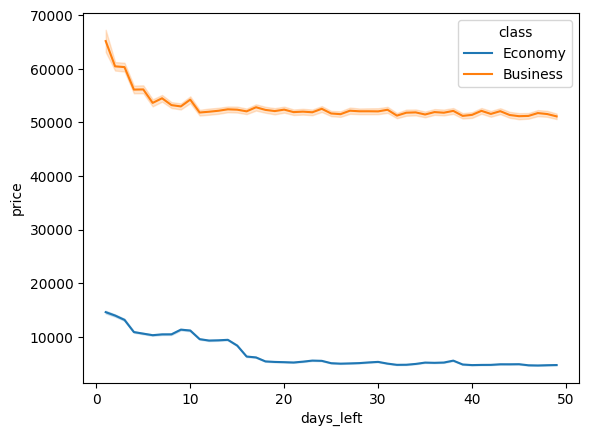

In [32]:
sns.lineplot(data=data,x="days_left",y="price",hue="class")
plt.show()

In [54]:
new_data = data [(data['airline'] == 'Vistara') & (data['source_city'] == 'Delhi') & (data['destination_city'] == 'Hyderabad')
     & (data['class'] == 'Business')]
new_data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219123,Vistara,UK-871,Delhi,Night,zero,Night,Hyderabad,Business,2.33,1,30630
219124,Vistara,UK-879,Delhi,Evening,zero,Evening,Hyderabad,Business,2.25,1,38470
219129,Vistara,UK-955,Delhi,Evening,one,Night,Hyderabad,Business,27.17,1,63513
219130,Vistara,UK-955,Delhi,Evening,one,Afternoon,Hyderabad,Business,18.50,1,65764
219131,Vistara,UK-985,Delhi,Evening,one,Night,Hyderabad,Business,25.08,1,69113
...,...,...,...,...,...,...,...,...,...,...,...
221863,Vistara,UK-963,Delhi,Morning,one,Early_Morning,Hyderabad,Business,23.00,49,53937
221864,Vistara,UK-985,Delhi,Evening,one,Early_Morning,Hyderabad,Business,12.00,49,59537
221865,Vistara,UK-985,Delhi,Evening,one,Afternoon,Hyderabad,Business,16.42,49,59537
221866,Vistara,UK-955,Delhi,Evening,one,Early_Morning,Hyderabad,Business,14.08,49,61889


In [55]:
new_data['price'].mean()

np.float64(47939.840361445786)